
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of generic asset classes and asset subclasses.  Construct portfolios of generic asset classes and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['asset-class-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,US Stocks,US Stocks,180.43,50.80,22.71,14.10,14.72,11.94,5.09,19.32,14.72,0.76
1,Global Stocks,Global Stocks,261.69,61.28,13.09,5.06,8.21,16.30,8.67,18.18,8.21,0.45
2,Bonds,Bonds,-1.57,0.31,6.70,5.21,4.34,3.26,2.09,3.51,4.34,1.24
3,Cash Equivalents,Cash Equivalents,0.17,-0.03,0.49,1.41,0.99,0.12,0.07,0.26,0.99,3.81
4,Real Estate,Real Estate,149.88,27.86,-3.33,5.03,6.54,20.66,8.61,18.74,6.54,0.35
5,Commodities,Commodities,129.69,30.34,-8.38,-3.54,0.34,12.08,3.68,18.87,0.34,0.02
6,Currencies,Currencies,36.39,2.38,-0.74,1.34,0.98,9.19,3.63,6.95,0.98,0.14
7,US Stocks:Large Cap,US Stocks:Large Cap,142.43,38.05,20.83,14.02,14.69,12.63,5.63,18.36,14.69,0.80
8,US Stocks:Mid Cap,US Stocks:Mid Cap,353.85,98.98,13.77,7.38,10.95,20.53,9.17,23.10,10.95,0.47
9,US Stocks:Small Cap,US Stocks:Small Cap,579.73,133.67,18.67,8.72,11.59,22.58,9.12,24.92,11.59,0.47


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
17,US Stocks:Technology,US Stocks:Technology,132.08,30.79,47.17,28.10,25.61,15.84,8.17,20.89,25.61,1.23
10,US Stocks:Growth,US Stocks:Growth,112.58,34.73,51.54,26.96,23.19,15.91,9.32,20.27,23.19,1.14
20,US Stocks:Utilities,US Stocks:Utilities,-21.77,26.36,1.91,7.17,12.01,18.05,11.31,13.69,12.01,0.88
35,Real Estate:REIT,Real Estate:REIT,107.20,22.80,-4.06,5.29,7.03,18.38,7.91,18.39,7.03,0.38
4,Real Estate,Real Estate,149.88,27.86,-3.33,5.03,6.54,20.66,8.61,18.74,6.54,0.35
36,Real Estate:Real Estate Funds,Real Estate:Real Estate Funds,149.88,27.86,-3.33,5.03,6.54,20.66,8.61,18.74,6.54,0.35
25,Global Stocks:Emerging Markets,Global Stocks:Emerging Markets,163.21,72.97,21.99,5.93,11.03,16.29,9.81,19.71,11.03,0.56
23,Global Stocks:Asia,Global Stocks:Asia,284.87,79.27,15.82,5.56,9.09,18.90,10.05,16.47,9.09,0.55
1,Global Stocks,Global Stocks,261.69,61.28,13.09,5.06,8.21,16.30,8.67,18.18,8.21,0.45
53,Currencies:Japanese Yen,Currencies:Japanese Yen,3.37,7.53,3.81,2.06,2.75,8.43,7.02,5.06,2.75,0.54


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# Put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'US Stocks': 0.50,
    'Bonds': 0.50
}

# Put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'US Stocks': 0.50,
    'Cash Equivalents:Treasury Bills': 0.50
}

# Top Dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'US Stocks:Technology': 1/7,
    'Real Estate:REIT': 1/7,
    'Global Stocks:Asia': 1/7,
    'Currencies:Japanese Yen': 1/7,
    'Commodities:Palladium': 1/7,
    'Cash Equivalents:Short Term Gov Bonds': 1/7,
    'Bonds': 1/7
    
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'US Stocks': 1/2,
    'Bonds': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'US Stocks:Large Cap': 1/3,
    'Bonds': 1/3,
    'Bonds:Investment Grade': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'US Stocks:Large Cap': 1/4,
    'US Stocks:Growth': 1/4,
    'US Stocks:Technology': 1/4,
    'Global Stocks': 1/4 
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'US Stocks:Large Cap': 0.90,
    'Cash Equivalents:Treasury Bills': 0.10
}

# Janet Yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'Bonds:Investment Grade': 0.50,
    'US Stocks:Large Cap': 0.40,
    'Cash Equivalents:Money Markets': 0.10
}

# Risk Off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'Cash Equivalents:Treasury Bills': 1/3,
    'Bonds': 1/3,
    'Cash Equivalents:Money Markets': 1/3
}

# Risk On: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'US Stocks:Large Cap': 1/3,
    'Global Stocks:Emerging Markets':1/3,
    'US Stocks:Small Cap': 1/3
}

# Everything Ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',
    'US Stocks:Technology': 1/8,
    'US Stocks:Growth': 1/8,
    'Real Estate:REIT': 1/8,
    'Currencies:Japanese Yen': 1/8,
    'Currencies:Chinese Yuan': 1/8,
    'Bonds': 1/8,
    'Bonds:Investment Grade': 1/8,
    'Bonds:High Yield': 1/8
}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = age_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Equal',
                          'US Stocks': 1/2},
    'Asset Subclass':    {'weight_by': None,
                          'Bonds:High Yield': 1/2},
    'Investment Option': {'weight_by': 'Sharpe Ratio'},
}
weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,US Stocks,Bonds,Age Portfolio
Annual Returns,14.72,4.34,9.53
Std Dev,19.32,3.51,10.07
Sharpe Ratio,0.76,1.24,0.95
Weight,0.50,0.50,1.00
Worst Typical Down Year,-23.92,-2.68,-10.62
Black Swan,-43.24,-6.19,-20.69


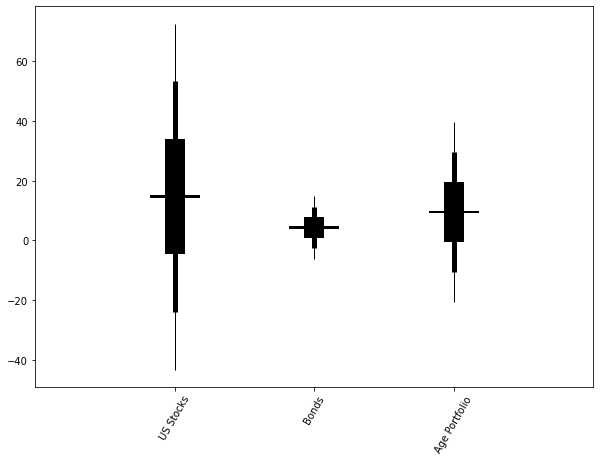

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

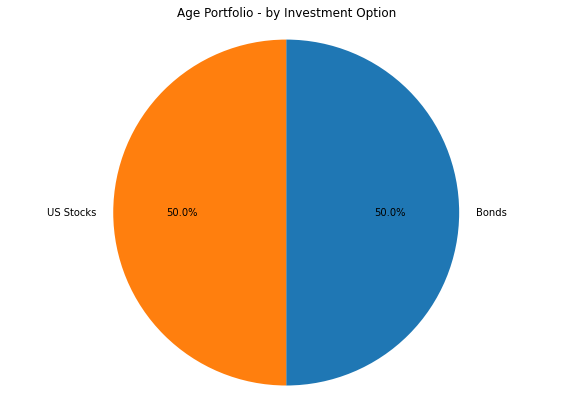

Bonds       0.50
US Stocks   0.50



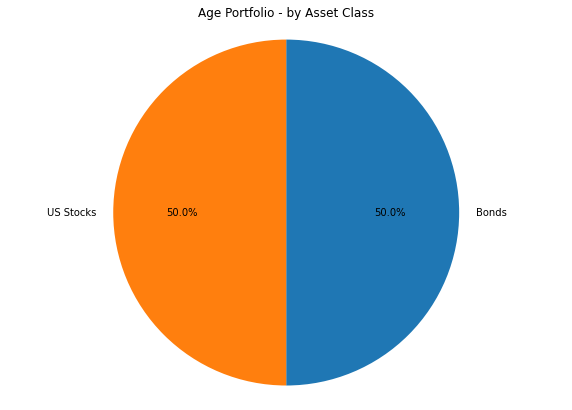

Bonds       0.50
US Stocks   0.50



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Age Portfolio Weights:
    US Stocks                      0.5000
    Bonds                          0.5000


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -20
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.....

Age Portfolio Metrics:              
    max_sharpe_ratio            1.07
    annual_return               7.97
    std_dev                     7.45
    worst typical down year    -6.93
    black_swan                -14.39


Age Portfolio Weights:
    US Stocks                      0.3500
    Bonds                          0.6500



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).